In [1]:
import numpy as np
import pandas as pd

In [2]:
df = pd.read_csv(r"D:\DS Projects\Real Estate Price Prediction\realtor_usa.csv")
df.head()

,brokered_by,status,price,bed,bath,acre_lot,street,city,state,zip_code,house_size,prev_sold_date
0,103378.0,for_sale,105000.0,3.0,2.0,0.12,1962661.0,Adjuntas,Puerto Rico,601.0,920.0,NaN
1,52707.0,for_sale,80000.0,4.0,2.0,0.08,1902874.0,Adjuntas,Puerto Rico,601.0,1527.0,NaN
2,103379.0,for_sale,67000.0,2.0,1.0,0.15,1404990.0,Juana Diaz,Puerto Rico,795.0,748.0,NaN
3,31239.0,for_sale,145000.0,4.0,2.0,0.10,1947675.0,Ponce,Puerto Rico,731.0,1800.0,NaN
4,34632.0,for_sale,65000.0,6.0,2.0,0.05,331151.0,Mayaguez,Puerto Rico,680.0,NaN,NaN


In [3]:
df.isnull().sum()

brokered_by         4533
status                 0
price               1541
bed               481317
bath              511771
acre_lot          325589
street             10866
city                1407
state                  8
zip_code             299
house_size        568484
prev_sold_date    734297
dtype: int64

In [4]:
df.shape

(2226382, 12)

In [5]:
df1 = df.copy()

In [6]:
df1.brokered_by = df1.brokered_by.fillna(df1.brokered_by.median())
df1.price = df1.price.fillna(df1.price.mean())
df1.bed = df1.bed.fillna(3.0)
df1.bath = df1.bath.fillna(2.0)
df1.acre_lot = df1.acre_lot.fillna(df1.acre_lot.median())
df1.street = df1.street.fillna(df1.street.median())
df1.city = df1.city.fillna('Houston')
df1.state = df1.state.fillna('Florida')
df1.zip_code = df1.zip_code.fillna(33993.0)
df1.house_size = df1.house_size.fillna(df1.house_size.median())

In [7]:
df1.isnull().sum()

brokered_by            0
status                 0
price                  0
bed                    0
bath                   0
acre_lot               0
street                 0
city                   0
state                  0
zip_code               0
house_size             0
prev_sold_date    734297
dtype: int64

In [8]:
df.state.mode()

0    Florida
Name: state, dtype: object

In [9]:
df.zip_code.mode()

0    33993.0
Name: zip_code, dtype: float64

In [10]:
df.city.mode()

0    Houston
Name: city, dtype: object

In [11]:
df.bed.mode()

0    3.0
Name: bed, dtype: float64

In [12]:
df.bath.mode()

0    2.0
Name: bath, dtype: float64

In [13]:
df.prev_sold_date.unique()

array([nan, '2020-02-28', '2019-06-28', ..., '2021-11-07', '2021-12-26',
       '2021-12-25'], dtype=object)

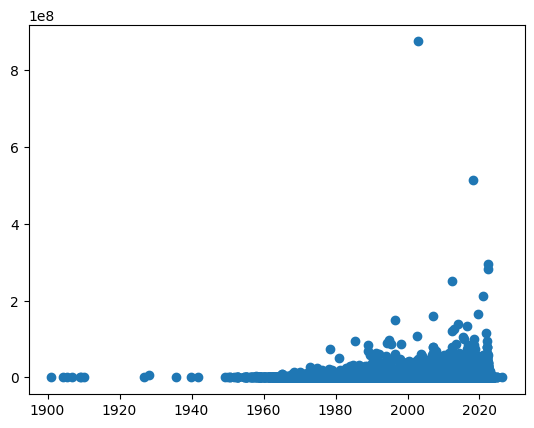

In [14]:
import matplotlib.pyplot as plt
df1['prev_sold_date'] = pd.to_datetime(df1['prev_sold_date'], errors='coerce')
plt.scatter(df1.prev_sold_date, df1.price)

In [15]:
df1.price.describe()

count    2.226382e+06
mean     5.241955e+05
std      2.138153e+06
min      0.000000e+00
25%      1.650000e+05
50%      3.250000e+05
75%      5.500000e+05
max      2.147484e+09
Name: price, dtype: float64

In [16]:
df2 = df1.copy()
df2.price = df1[df1.price < 100000000]['price']

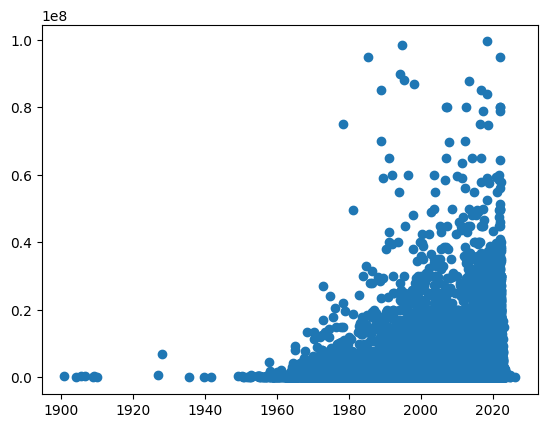

In [17]:
plt.scatter(df2.prev_sold_date, df2.price)

In [18]:
df2.bed.unique()

array([  3.,   4.,   2.,   6.,   5.,   1.,   9.,   7.,   8.,  12.,  13.,
        10.,  11.,  33.,  24.,  28.,  14.,  18.,  20.,  16.,  15.,  19.,
        17.,  40.,  21.,  86.,  31.,  27.,  42.,  60.,  22.,  32.,  99.,
        49.,  29.,  30.,  23.,  46.,  36.,  68., 123.,  25.,  47.,  35.,
        38.,  64.,  48.,  75., 142.,  61.,  70.,  53.,  26.,  34.,  54.,
        71., 210.,  66.,  44.,  37.,  62.,  72., 100.,  55.,  74.,  73.,
       473.,  52., 110., 136.,  50.,  98., 102.,  69.,  82.,  41.,  76.,
        43.,  80.,  67., 190.,  93.,  45.,  96.,  57.,  39.,  56.,  63.,
        90., 108., 111., 212.,  88., 222., 444., 148.,  84., 114., 120.])

In [19]:
df2[df2.bed > 100]

,brokered_by,status,price,bed,bath,acre_lot,street,city,state,zip_code,house_size,prev_sold_date
70245,34089.0,for_sale,NaN,123.0,123.0,0.26,1197898.0,New York City,New York,10471.0,1760.0,2012-06-29
156556,53224.0,for_sale,2100000.0,142.0,2.0,0.10,1587316.0,Rochester,New York,14609.0,1545.0,NaT
401858,25403.0,for_sale,575000.0,210.0,2.0,2.11,611259.0,Cleveland,Tennessee,37311.0,6026.0,NaT
583135,21069.0,for_sale,225000.0,473.0,157.0,0.26,975782.0,Brent,Alabama,35034.0,1760.0,NaT
637336,25373.0,for_sale,2100000.0,110.0,2.0,2.29,715488.0,Memphis,Tennessee,38108.0,36250.0,NaT
637798,8190.0,for_sale,5500000.0,136.0,2.0,4.71,999020.0,Memphis,Tennessee,38127.0,1760.0,2017-02-03
690428,10613.0,for_sale,1499000.0,102.0,99.0,0.50,575960.0,Dayton,Ohio,45405.0,7773.0,2013-09-24
957227,28717.0,for_sale,189000.0,190.0,163.0,3.57,309021.0,New Orleans,Louisiana,70129.0,110350.0,2017-01-24
1281369,59847.0,for_sale,18000000.0,108.0,108.0,4.92,748125.0,San Diego,California,92154.0,65960.0,1989-12-29
1330664,61696.0,for_sale,24898000.0,111.0,2.0,1.54,1629747.0,San Jose,California,95112.0,40796.0,NaT


In [20]:
sub_df = df2[(df2.bed > 100) & (df2.bath < 70) & (df2.acre_lot < 1.00)]

In [21]:
sub_df.head()

,brokered_by,status,price,bed,bath,acre_lot,street,city,state,zip_code,house_size,prev_sold_date
156556,53224.0,for_sale,2100000.0,142.0,2.0,0.10,1587316.0,Rochester,New York,14609.0,1545.0,NaT
1372303,50765.0,for_sale,9000000.0,108.0,50.0,0.26,176830.0,Keizer,Oregon,97303.0,48724.0,NaT


In [22]:
df2.drop([70245, 401858, 583135, 690428, 1370041, 1378596, 1379204, 1382122, 2188928], axis = 0, inplace = True)

In [23]:
df2[df2.bed > 100]

,brokered_by,status,price,bed,bath,acre_lot,street,city,state,zip_code,house_size,prev_sold_date
156556,53224.0,for_sale,2100000.0,142.0,2.0,0.10,1587316.0,Rochester,New York,14609.0,1545.0,NaT
637336,25373.0,for_sale,2100000.0,110.0,2.0,2.29,715488.0,Memphis,Tennessee,38108.0,36250.0,NaT
637798,8190.0,for_sale,5500000.0,136.0,2.0,4.71,999020.0,Memphis,Tennessee,38127.0,1760.0,2017-02-03
957227,28717.0,for_sale,189000.0,190.0,163.0,3.57,309021.0,New Orleans,Louisiana,70129.0,110350.0,2017-01-24
1281369,59847.0,for_sale,18000000.0,108.0,108.0,4.92,748125.0,San Diego,California,92154.0,65960.0,1989-12-29
1330664,61696.0,for_sale,24898000.0,111.0,2.0,1.54,1629747.0,San Jose,California,95112.0,40796.0,NaT
1372303,50765.0,for_sale,9000000.0,108.0,50.0,0.26,176830.0,Keizer,Oregon,97303.0,48724.0,NaT
1876419,60817.0,sold,2499000.0,114.0,57.0,7.00,533184.0,Lawrenceville,Illinois,62439.0,1760.0,2021-12-27
1896520,52841.0,sold,7000000.0,120.0,2.0,4.66,1622291.0,Fayetteville,Arkansas,72701.0,44475.0,2021-12-17


In [24]:
len(df2.city.unique())

20098

In [25]:
len(df2.state.unique())

55

In [26]:
df3 = df2.drop(['city'], axis = 1)

In [27]:
df3.prev_sold_date.mode()

0   2022-03-31
Name: prev_sold_date, dtype: datetime64[ns]

In [28]:
df3.prev_sold_date = df3.prev_sold_date.fillna('2022-03-31')

In [29]:
df3.isnull().sum()

brokered_by        0
status             0
price             28
bed                0
bath               0
acre_lot           0
street             0
state              0
zip_code           0
house_size         0
prev_sold_date     0
dtype: int64

In [30]:
df3.price = df3.price.fillna(df3.price.mean())

In [31]:
df3.isnull().sum()

brokered_by       0
status            0
price             0
bed               0
bath              0
acre_lot          0
street            0
state             0
zip_code          0
house_size        0
prev_sold_date    0
dtype: int64

In [32]:
stat_dummies = pd.get_dummies(df.status).astype(int)
ste_dummies = pd.get_dummies(df.state).astype(int)

In [33]:
df4 = pd.concat([df3, stat_dummies, ste_dummies], axis = 1)

In [34]:
df4.head()

,brokered_by,status,price,bed,bath,acre_lot,street,state,zip_code,house_size,...,Tennessee,Texas,Utah,Vermont,Virgin Islands,Virginia,Washington,West Virginia,Wisconsin,Wyoming
0,103378.0,for_sale,105000.0,3.0,2.0,0.12,1962661.0,Puerto Rico,601.0,920.0,...,0,0,0,0,0,0,0,0,0,0
1,52707.0,for_sale,80000.0,4.0,2.0,0.08,1902874.0,Puerto Rico,601.0,1527.0,...,0,0,0,0,0,0,0,0,0,0
2,103379.0,for_sale,67000.0,2.0,1.0,0.15,1404990.0,Puerto Rico,795.0,748.0,...,0,0,0,0,0,0,0,0,0,0
3,31239.0,for_sale,145000.0,4.0,2.0,0.10,1947675.0,Puerto Rico,731.0,1800.0,...,0,0,0,0,0,0,0,0,0,0
4,34632.0,for_sale,65000.0,6.0,2.0,0.05,331151.0,Puerto Rico,680.0,1760.0,...,0,0,0,0,0,0,0,0,0,0


In [35]:
df4.status.unique()

array(['for_sale', 'ready_to_build', 'sold', nan], dtype=object)

In [36]:
df4.price.fillna(df4.price.mean())
df4.prev_sold_date = df4.prev_sold_date.dt.year

In [37]:
df4.dropna(inplace = True)

In [38]:
df4.isnull().sum()

brokered_by      0
status           0
price            0
bed              0
bath             0
                ..
Virginia         0
Washington       0
West Virginia    0
Wisconsin        0
Wyoming          0
Length: 69, dtype: int64

In [39]:
df4.drop(['sold', 'Utah', 'status', 'state'], axis = 1, inplace = True)

In [40]:
from sklearn.model_selection import train_test_split
X = df4.drop(['price'], axis = 1)
Y = df4.price

X_train, X_test, Y_train, Y_test = train_test_split(X, Y)

In [41]:
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import LogisticRegression
from sklearn import tree
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.cluster import KMeans
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import StandardScaler

In [42]:
from sklearn.model_selection import cross_val_score
scale = StandardScaler()
X_scaled = scale.fit_transform(X)

In [43]:
cross_val_score(LinearRegression(), X, Y)

array([ 0.15955811,  0.05063588, -1.53041178,  0.14095516,  0.26506093])

In [44]:
Y_class = pd.cut(Y, bins=2, labels=[0, 1])

In [45]:
cross_val_score(LogisticRegression(max_iter = 500), X_scaled, Y_class)

array([0.99994385, 0.99994161, 0.99993487, 0.99968783, 0.99994835])

In [47]:
cross_val_score(tree.DecisionTreeClassifier(), X_scaled, Y_class)

array([0.84302061, 0.9999461 , 0.99786649, 0.99974622, 0.99994161])

In [ ]:
cross_val_score(SVC(), X_scaled, Y_class)

In [ ]:
cross_val_score(RandomForestClassifier(), X, Y)

In [ ]:
cross_val_score(KMeans(), X, Y)

In [ ]:
cross_val_score(KNeighborsClassifier(), X, Y)